## Секция 1. Вопросы


1. Своё владение языком Python для должности аналитик данных оцениваю на 8 из 10
2. Своё владение Google Sheets оцениваю на 7 из 10, так как в основном работал с Excel, но Google Sheets сильно на него похож

## Секция 2. Задачи на логику


1) Рекламная кампания стартовала вчера с дневным бюджетом 40 $. Половина
бюджета была израсходована к полудню, а 80% оставшегося бюджета было
потрачено между полуднем и временем закрытия. Сколько долларов не было
потрачено?

In [ ]:
 #40$ - 100%, значит, к полудню осталось 20$, 80% от 20$ было потрачено после,
 #значит не было потрачено 0.2 * 20 = 4$

2) 5 идентичных рекламных кампаний работали 24 дня по 6 часов в день,
потрачено было 120 долларов. Сколько дней они работали бы на 216 долларов,
если бы 9 одинаковых кампаний работали бы по 8 часов в день?

In [ ]:
#Сначала рассчитаем, сколько стоит 1 час работы 1 компании = 120/(24*5*6) = 0.16667
#Теперь вычислим количество часов, которое бы работала одна компания за 216 долларов, поделим это на 9 компаний и приведём к дням
#(216/0.16667)/(9*8) = 18 дней

3) Дизайнеры создали 200 рекламных баннеров для двух рекламных кампаний. 80
из них не использовались ни в кампании No1, ни в кампании No2, 60
использовались только в кампании No1. И для каждого рекламного баннера,
который использовался в обеих кампаниях, приходится 3 баннера, которые
использовались только в кампании No2. Сколько баннеров было использовано в
обеих рекламных кампаниях?

In [ ]:
#Сразу 200 - 80 = 120, 60 только в компании №1, поэтому 120 - 60 = 60
#Тут простейшее уравнение Х + 3Х = 60
#15 баннеров было использовано в обеих рекламных кампаниях

4) Энн использует Instagram, но не Facebook, а Джон использует Youtube и
Facebook. Кейт использует Youtube, но не Instagram, а Том использует Facebook,
но не Youtube. Если каждый человек использует две из трех социальных сетей,
у кого предпочтения совпадают?

In [ ]:
#Если сетей всего 3: Yotube, Facebook и Instagram, то тогда:
#Энн: Instagram, Youtube | Джон: Youtube, Facebook | Том: Facebook, Instagram
#Полностью не совпадает ни у кого, но у Энн и Джона Youtube, у Джона и Тома Facebook, у Энн и Тома Instagram

5) Средний итоговый балл стажера по 4 модулям составляет 78 баллов. Сколько
баллов должен получить стажер за 5-й модуль, чтобы средний балл по всему
заданию составил 80?

In [ ]:
# (78+78+78+78+Х)/5 = 80
#78*4 + Х = 400
#Х = 88

6) Заказанные в приложении товары доставляются на автомобиле. Автомобиль
проезжает 260 км со средней скоростью 80 км / ч. На обратном пути машина
движется со средней скоростью 100 км / ч. Насколько быстрее был обратный
путь? Ответ указать в минутах.

In [ ]:
#260/80 = 3 часа 15 минут
#260/100 = 2 часа 36 минут
#Быстрее на 39 минут

## Секция 3. Техническое задание

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [176]:
df = pd.read_excel('/content/data.xlsx')

In [161]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,sales_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00,NaN
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,NaN
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,NaN
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       691 non-null    float64
 1   sum             691 non-null    float64
 2   status          691 non-null    object 
 3   sale            691 non-null    object 
 4   new/current     691 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        676 non-null    object 
 7   receiving_date  581 non-null    object 
dtypes: float64(3), object(5)
memory usage: 48.6+ KB


In [101]:
df['status'].value_counts()

,count
status,
ОПЛАЧЕНО,622
ПРОСРОЧЕНО,52
В РАБОТЕ,44
НА ПОДПИСАНИИ,5
Май 2021,1
ВНУТРЕННИЙ,1
Июнь 2021,1
Июль 2021,1
Август 2021,1


In [177]:
# На всякий случай почищу датасет
df = df.drop_duplicates()
df['sale_date'] = df['status'].replace(['ПРОСРОЧЕНО', 'ОПЛАЧЕНО', 'ВНУТРЕННИЙ', 'В РАБОТЕ', 'НА ПОДПИСАНИИ'], np.nan)
df['sale_date'] = df['sale_date'].ffill()
df['sales_date'] = df['sale_date'].copy()
df.drop('sale_date', axis = 1, inplace = True)
df = df[df['client_id'] > 0]
df.head()
df['sales_date']

<ipython-input-177-3fc8b6b4f39a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale_date'] = df['status'].copy()
<ipython-input-177-3fc8b6b4f39a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale_date'] = df['status'].replace(['ПРОСРОЧЕНО', 'ОПЛАЧЕНО', 'ВНУТРЕННИЙ', 'В РАБОТЕ', 'НА ПОДПИСАНИИ'], np.nan)
<ipython-input-177-3fc8b6b4f39a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,sales_date
1,Май 2021
2,Май 2021
3,Май 2021
4,Май 2021
5,Май 2021
...,...
725,Октябрь 2021
726,Октябрь 2021
727,Октябрь 2021
728,Октябрь 2021


In [187]:
#df = df.drop('Unnamed: 5', axis = 1)
df.head()


,client_id,sum,status,sale,new/current,document,receiving_date,sales_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,2021-05-01,5
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,2021-05-01,5
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05-01,5
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05-01,5
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,2021-05-01,5


In [181]:
months = {
    'Январь': 1, 'Февраль': 2, 'Март': 3, 'Апрель': 4,
    'Май': 5, 'Июнь': 6, 'Июль': 7, 'Август': 8,
    'Сентябрь': 9, 'Октябрь': 10, 'Ноябрь': 11, 'Декабрь': 12
}
df['sales_date'] = df['sales_date'].apply(lambda x: pd.Timestamp(year=int(x.split()[1]), month=months[x.split()[0]], day=1))
df['sales_date']

,sales_date
1,2021-05-01
2,2021-05-01
3,2021-05-01
4,2021-05-01
5,2021-05-01
...,...
725,2021-10-01
726,2021-10-01
727,2021-10-01
728,2021-10-01


Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [183]:
df_july_sum = df[(df['sales_date'] == '2021-07-01') & df['status'] != 'ПРОСРОЧЕНО']
df_july_sum['sum'].sum()

5029310.33

Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

<ipython-input-184-e887346d6555>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['sales_date'], y=df['sum'], ci = None)


<Axes: xlabel='sales_date', ylabel='revenue'>

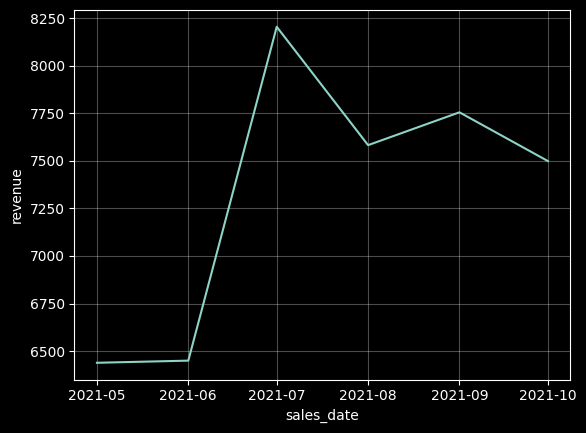

In [184]:
plt.ylabel('revenue')
plt.grid(True, alpha = 0.3)
sns.lineplot(x=df['sales_date'], y=df['sum'], ci = None)

Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [188]:
df['month'] = df['sales_date'].dt.month
df_sep = df[df['month'] == 9]
df_sep.groupby('sale').agg({'sum':'sum'}).sort_values(by = 'sum', ascending = False)

,sum
sale,
Смирнов,212084.60
Петрова,145890.76
Андреев,132646.30
Иванов,94770.60
Кузнецова,72228.40
Филимонова,59514.47
Васильев,49895.45
Соколов,35183.50
Михайлов,4268.70


Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [189]:
new = len(df[(df['month'] == 10) & (df['new/current'] == 'новая')])
current = len(df[(df['month'] == 10) & (df['new/current'] == 'текущая')])
print(f'Тип "новая" = {new}, тип "текущая" = {current}')

Тип "новая" = 35, тип "текущая" = 95


Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [194]:
df_new_d = df[(df['month'] == 5) & (df['receiving_date'].str[:7] == '2021-06') & (df['document'] == 'оригинал')]
print(f'{len(df_new_d)} договор было получено по майским сделкам в июне 2021')

0 договор было получено по майским сделкам в июне 2021


За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [202]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')
df_filtered = df[(df['receiving_date'] > '2021-06-30') & (df['receiving_date'] > df['sales_date'])]

def bonus(data):
  if data['status'] == 'ОПЛАЧЕНО' and data['new/current'] == 'новая' and data['document'] == 'оригинал':
    return 0.07*data['sum']
  if data['status'] != 'ПРОСРОЧЕНО' and data['new/current'] == 'текущая' and data['document'] == 'оригинал':
    if data['sum'] > 10000:
      return 0.05*data['sum']
    else:
      return 0.03*data['sum']
  return 0
df_filtered['bonus'] = df_filtered.apply(bonus, axis = 1)
df_filtered.groupby('sale').agg({'bonus':'sum'})

<ipython-input-202-a2c46dbf5415>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bonus'] = df_filtered.apply(bonus, axis = 1)


,bonus
sale,
Андреев,25959.1683
Васильев,6419.9815
Иванов,21842.1350
Кузнецова,16108.7711
Михайлов,607.0680
Петрова,27137.5202
Селиванов,7043.6210
Смирнов,29348.2720
Соколов,3668.7980
